In [1]:
import networkx as nx
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations, get_dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
from pykeen.models import predict
from pykeen.evaluation import evaluate, RankBasedEvaluator
from pykeen.metrics.ranking import HitsAtK
import pandas as pd

seed = 1234

In [2]:
def show_metrics(dictionary):
    for key in dictionary.keys():
        print(key)
        display(pd.DataFrame(dictionary[key]))

For transE, and therefore for transductive link prediction, it is necessary that all the entities and relations are present in the train set

In [2]:
from pykeen.hpo import hpo_pipeline
import os
from pykeen.triples import TriplesFactory


NATIONS_TRAIN_PATH = "MSCallGraph_0_train.tsv"
NATIONS_TEST_PATH = "MSCallGraph_0_test.tsv"
NATIONS_VALIDATE_PATH = "MSCallGraph_0_validation.tsv"


training = TriplesFactory.from_path(NATIONS_TRAIN_PATH)
testing = TriplesFactory.from_path(
    NATIONS_TEST_PATH,
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id,
)
validation = TriplesFactory.from_path(
    NATIONS_VALIDATE_PATH,
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id,
)
pipeline_result = pipeline(
#    n_trials=3,  # you probably want more than this
    training=training,
    testing=testing,
    validation=validation,
    model='TransE',
    epochs=5,  # short epochs for testing - you should go higher
    random_seed = seed,
)
pipeline_result.save_to_directory(os.getcwd()+'/MSCallGraph0_transE')

FileNotFoundError: [Errno 2] No such file or directory: 'MSCallGraph_0_train.tsv'

In [4]:
# result on the test set
show_metrics(pipeline_result.metric_results.to_dict())

head


,optimistic,realistic,pessimistic
adjusted_inverse_harmonic_mean_rank,1.975007e-02,1.975007e-02,1.975006e-02
median_rank,1.379000e+03,1.379000e+03,1.379000e+03
adjusted_geometric_mean_rank_index,5.434537e-01,5.434534e-01,5.434533e-01
standard_deviation,1.490043e+03,1.490043e+03,1.490043e+03
z_inverse_harmonic_mean_rank,1.393112e+02,1.393112e+02,1.393112e+02
inverse_geometric_mean_rank,1.046125e-03,1.046124e-03,1.046124e-03
z_arithmetic_mean_rank,7.729714e+01,7.729710e+01,7.729705e+01
count,1.431700e+04,1.431700e+04,1.431700e+04
median_absolute_deviation,1.485567e+03,1.485567e+03,1.485567e+03
adjusted_arithmetic_mean_rank_index,3.730703e-01,3.730702e-01,3.730699e-01


tail


,optimistic,realistic,pessimistic
adjusted_inverse_harmonic_mean_rank,2.554876e-02,2.554876e-02,2.554876e-02
median_rank,7.620000e+02,7.620000e+02,7.620000e+02
adjusted_geometric_mean_rank_index,7.524161e-01,7.524159e-01,7.524158e-01
standard_deviation,1.394160e+03,1.394161e+03,1.394162e+03
z_inverse_harmonic_mean_rank,1.808281e+02,1.808281e+02,1.808281e+02
inverse_geometric_mean_rank,1.914394e-03,1.914392e-03,1.914391e-03
z_arithmetic_mean_rank,1.127884e+02,1.127883e+02,1.127883e+02
count,1.431700e+04,1.431700e+04,1.431700e+04
median_absolute_deviation,9.755523e+02,9.755523e+02,9.755523e+02
adjusted_arithmetic_mean_rank_index,5.443265e-01,5.443263e-01,5.443260e-01


both


,optimistic,realistic,pessimistic
adjusted_inverse_harmonic_mean_rank,2.264943e-02,2.264943e-02,2.264943e-02
median_rank,1.055000e+03,1.055000e+03,1.055000e+03
adjusted_geometric_mean_rank_index,6.637677e-01,6.637676e-01,6.637673e-01
standard_deviation,1.462548e+03,1.462548e+03,1.462549e+03
z_inverse_harmonic_mean_rank,2.263225e+02,2.263225e+02,2.263225e+02
inverse_geometric_mean_rank,1.415166e-03,1.415166e-03,1.415164e-03
z_arithmetic_mean_rank,1.344931e+02,1.344930e+02,1.344929e+02
count,2.863400e+04,2.863400e+04,2.863400e+04
median_absolute_deviation,1.276521e+03,1.276521e+03,1.276521e+03
adjusted_arithmetic_mean_rank_index,4.589849e-01,4.589847e-01,4.589845e-01


<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

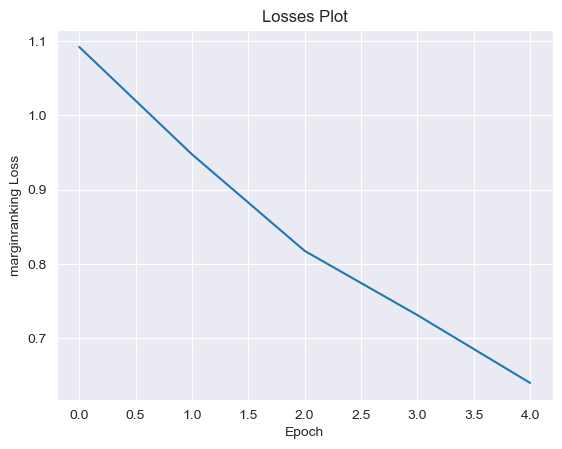

In [5]:
pipeline_result.plot_losses()

In [6]:
model = pipeline_result.model
# Predict tails and see if they are in the train set
predicted_tails_df = predict.get_prediction_df(
    model=model, head_label = "84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8337d1e3c28b6d07923", relation_label="rpc", triples_factory=pipeline_result.training,
)


predicted_tails_df

,tail_id,tail_label,score,in_training
2982,2982,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...,-5.347712,False
658,658,1e44834f8aaedbdc8bcc77833526665f42e5497c9a7a03...,-6.037204,False
3148,3148,8cd90231ddec123d5c4d9ca322684aafe9ea112f9e9a85...,-6.235138,False
5027,5027,e003a0916ca9142533d444f52511b29ef18e37eb0ce7d1...,-6.334383,False
5243,5243,e9b5993724d2f6d0e47bb119c5e3ccdfb7b22325395fb8...,-6.429334,False
...,...,...,...,...
432,432,130a39f7c04d63f00dad9c93e549ab50ad7ffb02e52924...,-11.050646,False
548,548,18c7000c696307a7330d2065de542854d0d44f1e2e9f77...,-11.088130,False
4839,4839,d89fbccfd8409860366d75267dfeb464cf3123c72e752c...,-11.131686,False
5589,5589,f90df04978f4d1ccde609dbab7a09f1f026f79ed3ec4f9...,-11.187768,False


In [7]:
model = pipeline_result.model
# Predict tails and see if they are in the validation set
predicted_tails_df = predict.get_prediction_df(
    model=model, head_label = "84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8337d1e3c28b6d07923", relation_label="rpc", triples_factory=validation,
)


predicted_tails_df

,tail_id,tail_label,score,in_training
2982,2982,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...,-5.347712,False
658,658,1e44834f8aaedbdc8bcc77833526665f42e5497c9a7a03...,-6.037204,False
3148,3148,8cd90231ddec123d5c4d9ca322684aafe9ea112f9e9a85...,-6.235138,False
5027,5027,e003a0916ca9142533d444f52511b29ef18e37eb0ce7d1...,-6.334383,False
5243,5243,e9b5993724d2f6d0e47bb119c5e3ccdfb7b22325395fb8...,-6.429334,False
...,...,...,...,...
432,432,130a39f7c04d63f00dad9c93e549ab50ad7ffb02e52924...,-11.050646,False
548,548,18c7000c696307a7330d2065de542854d0d44f1e2e9f77...,-11.088130,False
4839,4839,d89fbccfd8409860366d75267dfeb464cf3123c72e752c...,-11.131686,False
5589,5589,f90df04978f4d1ccde609dbab7a09f1f026f79ed3ec4f9...,-11.187768,False


In [8]:
model = pipeline_result.model
# Predict tails and see if they are in the test set
predicted_tails_df = predict.get_prediction_df(
    model=model, head_label = "84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8337d1e3c28b6d07923", relation_label="rpc", triples_factory=testing,
)


predicted_tails_df

,tail_id,tail_label,score,in_training
2982,2982,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...,-5.347712,False
658,658,1e44834f8aaedbdc8bcc77833526665f42e5497c9a7a03...,-6.037204,False
3148,3148,8cd90231ddec123d5c4d9ca322684aafe9ea112f9e9a85...,-6.235138,False
5027,5027,e003a0916ca9142533d444f52511b29ef18e37eb0ce7d1...,-6.334383,False
5243,5243,e9b5993724d2f6d0e47bb119c5e3ccdfb7b22325395fb8...,-6.429334,False
...,...,...,...,...
432,432,130a39f7c04d63f00dad9c93e549ab50ad7ffb02e52924...,-11.050646,False
548,548,18c7000c696307a7330d2065de542854d0d44f1e2e9f77...,-11.088130,False
4839,4839,d89fbccfd8409860366d75267dfeb464cf3123c72e752c...,-11.131686,False
5589,5589,f90df04978f4d1ccde609dbab7a09f1f026f79ed3ec4f9...,-11.187768,False


In [9]:
# Predict relations
predicted_relations_df = predict.get_prediction_df(
    model=model, head_label="84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8337d1e3c28b6d07923", tail_label="75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b8d2bce19f754070f6a", triples_factory=pipeline_result.training,
)
predicted_relations_df

,relation_id,relation_label,score,in_training
4,4,rpc,-7.070793,True
3,3,mq,-7.652914,False
2,2,mc,-8.337928,False
1,1,http,-9.080814,False
0,0,db,-9.226712,False
5,5,userDefined,-9.425705,False


In [10]:
# Predict heads
predicted_heads_df = predict.get_prediction_df(
    model=model, relation_label="rpc", tail_label="75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b8d2bce19f754070f6a", triples_factory=pipeline_result.training
)
predicted_heads_df

,head_id,head_label,score,in_training
2646,2646,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,-5.347712,False
200,200,094fb852f595356fb536492f5c30261ec9d3d4f3f00b2a...,-5.752474,False
580,580,1ac11695e202b1e572c9cb3e6f0f5f658c1d1e65282418...,-6.316035,False
1952,1952,5855f615e2b914e2866ed8b8df06463ef583ea30b09ea3...,-6.344000,False
4671,4671,d1429692a6a402d375550d15122af14437fc41a7da630a...,-6.463887,False
...,...,...,...,...
5459,5459,f3a464c182ddce160fa4870b32fa463d312d48ec2bce04...,-11.035421,False
273,273,0c97c6aecacc39b7a19a7b00e35ecffc49be4322204a4c...,-11.234930,False
5506,5506,f5857c9b71ef020428302cac797b9ec8e26fa805d54cb3...,-11.361404,False
3722,3722,a5d62e6d2cd4c68f8c2daca334770500f3100013e406c5...,-11.436870,False


In [11]:
# # Score all triples (memory intensive)
# predictions_df = predict.get_all_prediction_df(model, triples_factory=pipeline_result.training)
# predictions_df

In [12]:
# Score top K triples (computationally expensive)
top_k_predictions_df = predict.get_all_prediction_df(model, k=10, triples_factory=pipeline_result.training)
top_k_predictions_df

scoring:   0%|          | 0.00/34.4k [00:00<?, ?batch/s]

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score,in_training
0,2267,65ceb2782457ad9400b7668fc02d3ad3d79f86469b2be8...,4,rpc,1255,38e2d46aac6ca257afccf4aeeeb2e18b70d20943e4fe1c...,-5.028547,False
1,837,26a4f6dd6339b1bdcd5b057d51920441acc6b56d245686...,4,rpc,1271,398ee92f1e74618a9e32df7b84795d5882ba1e1f48878d...,-5.039193,False
2,1364,3d7d14a93c989378741f7e4d9ef75d76dc77b02e0a5e38...,1,http,4801,d7046ccdaf5fac29299e630b586b65dd2af0670509979d...,-5.075776,False
3,2159,60d160aedccfcb8295be3297ca7fd9b08bda5dc8c553e7...,3,mq,2694,7794a38782d9da89768c0f858b7c66a148b0f5b70ec8fd...,-5.087463,False
4,1816,511a2bbf6300d2a7e5a5ec7b087d06795c48dd7c61e839...,4,rpc,1578,4752b852cb0e614a2d8200cc504e68d8820d165effe2e8...,-5.121164,False
5,4990,ded742ee83d2e3ac6b4952f7dcad22041aed0fd1bbc5d8...,4,rpc,2668,7697a451ad3eab3c6a83e275e669bb4ee54cd012d61c9e...,-5.167340,False
6,4677,d1b569850f04df209add2bbbe4c8f7b93732b0b5bcf0a4...,2,mc,5610,fa3ba7a04f86ee8b32783a3ed2ce00ce5c6a52a3ff7198...,-5.205822,False
7,1364,3d7d14a93c989378741f7e4d9ef75d76dc77b02e0a5e38...,4,rpc,2815,7d4714938cb6049055e9aa2d784e28b85459cf2a1ebf6f...,-5.206954,False
8,3486,9cd44f1b3a60567136e9582fe05e3cef48af5afe220acc...,3,mq,4032,b2e11de3db205193869388c246e79ed069e0829d9e3f4c...,-5.262852,False
9,2029,5b8d013a67cdbbd830d61c4e85e3b2cb260a11bf2a064a...,4,rpc,4559,cb5521c22ae30700dccf98da8f894cb975f0aa40065554...,-5.293293,False


In [13]:
# Score a given list of triples
score_df = predict.predict_triples_df(
    model=model,
    triples=[('84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8337d1e3c28b6d07923',
              'rpc',
              '75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b8d2bce19f754070f6a'),
             ('01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0eec5fc1aeb15e341a85',
              'mc',
              '4ab265f54516248ee8873be7d6441912456ce17e84f39918e01ddc4210e56da5')],
    triples_factory=pipeline_result.training,
)
score_df

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score
0,36,01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0e...,2,mc,1653,4ab265f54516248ee8873be7d6441912456ce17e84f399...,-7.706357
1,2982,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...,4,rpc,2646,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,-7.070793


## Evaluation
If the results are the same, it means that the traces are the same

### Rank Based Evaluator

inverse harmonic mean rank == mean reciprocal rank https://cthoyt.com/2021/04/19/pythagorean-mean-ranks.html

Pykeen does not allow for a raw evaluation, filtered only.

In [14]:
results_training_filtered = evaluate(model=model,mapped_triples=pipeline_result.training.mapped_triples,
                            evaluator = RankBasedEvaluator(filtered = True,metrics = ['meanreciprocalrank', HitsAtK(1),
                                                                                      HitsAtK(3), HitsAtK(5), HitsAtK(10)],
                                                          add_defaults = False),mode=None,
                            additional_filter_triples=[pipeline_result.training.mapped_triples])
print("Training filtered evaluation")
show_metrics(results_training_filtered.to_dict())

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/10.4k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 39.56s seconds


Training filtered evaluation
head


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.019566,0.019566,0.019566
hits_at_1,0.015989,0.015989,0.015989
hits_at_3,0.017145,0.017145,0.017145
hits_at_5,0.017819,0.017819,0.017819
hits_at_10,0.020998,0.020998,0.020998


tail


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.026499,0.026499,0.026499
hits_at_1,0.014641,0.014641,0.014641
hits_at_3,0.022635,0.022635,0.022635
hits_at_5,0.027740,0.027740,0.027740
hits_at_10,0.039395,0.039395,0.039395


both


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.023033,0.023033,0.023033
hits_at_1,0.015315,0.015315,0.015315
hits_at_3,0.019890,0.019890,0.019890
hits_at_5,0.022780,0.022780,0.022780
hits_at_10,0.030196,0.030196,0.030196


In [15]:
results_validation_filtered = evaluate(model=model,mapped_triples=validation.mapped_triples,
                            evaluator = RankBasedEvaluator(filtered = True,metrics = ['meanreciprocalrank', HitsAtK(1),
                                                                                      HitsAtK(3), HitsAtK(5), HitsAtK(10)],
                                                          add_defaults = False),mode=None,
                            additional_filter_triples=[pipeline_result.training.mapped_triples])
print("Validation filtered evaluation")
show_metrics(results_validation_filtered.to_dict())

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/12.1k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 37.73s seconds


Validation filtered evaluation
head


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.019900,0.019900,0.019900
hits_at_1,0.016329,0.016329,0.016329
hits_at_3,0.017730,0.017730,0.017730
hits_at_5,0.018638,0.018638,0.018638
hits_at_10,0.021524,0.021524,0.021524


tail


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.026372,0.026372,0.026372
hits_at_1,0.015339,0.015339,0.015339
hits_at_3,0.022926,0.022926,0.022926
hits_at_5,0.027379,0.027379,0.027379
hits_at_10,0.038512,0.038512,0.038512


both


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.023136,0.023136,0.023136
hits_at_1,0.015834,0.015834,0.015834
hits_at_3,0.020328,0.020328,0.020328
hits_at_5,0.023008,0.023008,0.023008
hits_at_10,0.030018,0.030018,0.030018


In [16]:
results_testing_filtered = evaluate(model=model,mapped_triples=testing.mapped_triples,
                            evaluator = RankBasedEvaluator(filtered = True,metrics = ['meanreciprocalrank', HitsAtK(1),
                                                                                      HitsAtK(3), HitsAtK(5), HitsAtK(10)],
                                                          add_defaults = False),mode=None,
                            additional_filter_triples=[pipeline_result.training.mapped_triples])
print("Testing filtered evaluation")
show_metrics(results_testing_filtered.to_dict())

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/14.3k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 44.77s seconds


Testing filtered evaluation
head


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.021341,0.021341,0.021341
hits_at_1,0.017881,0.017881,0.017881
hits_at_3,0.019208,0.019208,0.019208
hits_at_5,0.020186,0.020186,0.020186
hits_at_10,0.022980,0.022980,0.022980


tail


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.027121,0.027121,0.027121
hits_at_1,0.016763,0.016763,0.016763
hits_at_3,0.024097,0.024097,0.024097
hits_at_5,0.028218,0.028218,0.028218
hits_at_10,0.038416,0.038416,0.038416


both


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.024231,0.024231,0.024231
hits_at_1,0.017322,0.017322,0.017322
hits_at_3,0.021653,0.021653,0.021653
hits_at_5,0.024202,0.024202,0.024202
hits_at_10,0.030698,0.030698,0.030698
